# 机器学习纳米学位
## 监督学习
## 项目2: 携程机票航班延误预测

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

我们知道，航班延误对于旅客、售卖机票的平台以及航空公司都是一个比较头疼的问题。造成航班延误的因素有很多，包括台风、雾霾、飞机故障、航空管制等等原因。在这个项目中，我们将探索在飞机起飞前2小时做航班延误预测这个实际问题，你将从实际问题出发，探索数据，抽取数据特征，构建模型并作出预测。

这个项目的数据来自[航班动态起降数据集](https://www.kesci.com/home/dataset/59793a5a0d84640e9b2fedd3)，该数据集用2015年5月到2017年5月的机场情况作为训练集，用201年6月作为测试集。你可以通过报名该比赛获取数据集，另外，为了方便大家获取数据，我们也提供了一个[下载地址](https://drive.google.com/open?id=1tERyIkn1sss8jWv5RHFdslfxhzB-MzIs)，你下载后放置data文件夹中。

**数据说明：**


- ./data/2015年5月到2017年5月城市天气.csv
- ./data/2015年5月到2017年5月航班动态数据.csv
- ./data/2015年5月到2017年5月特情.xlsx
- ./data/机场城市对应表.xlsx


 运行下面区域的代码以载入一些此项目所需的Python库。如果成功返回提示语句，则说明载入成功。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('你已经成功载入所有库！')

你已经成功载入所有库！


## 数据初探

 我们先导入数据，然后观察头部数据。可以使用[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) 分别加载对应格式的数据，然后使用[head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据

In [15]:
# TODO: 导入并观察航班数据，
# 文件路径 './data/2015年5月到2017年5月航班动态数据.csv'
# 注意使用字符编码 encoding="gb2312"
flight_data_path = './data/2015年5月到2017年5月航班动态数据.csv'
flight_data = pd.read_table(flight_data_path, sep=',', encoding='gb2312')

In [16]:
flight_data.head(20)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消
7,NKG,HAK,GS6538,1452999900,1453010100,1.453005e+09,1.453014e+09,7.0,正常
8,LZO,PEK,MU5709,1452910200,1452919800,1.452910e+09,1.452918e+09,8.0,正常
9,WEH,HGH,CA1788,1453708200,1453715100,1.453708e+09,1.453714e+09,9.0,正常


In [17]:
# 导入并观察天气数据
# 文件路径 "./data/2015年5月到2017年5月城市天气.csv"
weather_data_path = './data/2015年5月到2017年5月城市天气.csv'
weather = pd.read_csv(weather_data_path)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
weather.head()

,城市,天气,最低气温,最高气温,日期,Unnamed: 5
0,厦门,阴,21,26,2015-05-01,NaN
1,宁德,阵雨,19,25,2015-05-01,NaN
2,莆田,阵雨转阴,20,26,2015-05-01,NaN
3,泉州,阴,22,26,2015-05-01,NaN
4,漳州,阵雨转阴,22,28,2015-05-01,NaN


观察数据，发现有一列没有用的空表格 “Unnamed: 5”，你需要使用 `del` 将其从 `weather` 数据中删除

In [19]:
# TODO：删除 weather 中无用的列 【Unnamed: 5】
del weather['Unnamed: 5']

In [20]:
weather.head(20)

,城市,天气,最低气温,最高气温,日期
0,厦门,阴,21,26,2015-05-01
1,宁德,阵雨,19,25,2015-05-01
2,莆田,阵雨转阴,20,26,2015-05-01
3,泉州,阴,22,26,2015-05-01
4,漳州,阵雨转阴,22,28,2015-05-01
5,龙岩,小雨转阴,20,26,2015-05-01
6,三明,小雨,20,25,2015-05-01
7,南平,雷阵雨转中雨,20,28,2015-05-01
8,南昌,小雨转中雨,22,27,2015-05-01
9,九江,雷阵雨转大雨,19,28,2015-05-01


In [21]:
# 导入并观察城市与机场对应数据
# 文件路径 "./data/机场城市对应表.xlsx"
airport_city_data_path = './data/机场城市对应表.xlsx'
airport_city = pd.read_excel(airport_city_data_path)

In [22]:
airport_city.head()

,机场编码,城市名称
0,AHJ,阿坝
1,AYN,安阳
2,HSC,韶关
3,HCJ,河池
4,XNT,邢台


In [23]:
# 特情数据导入
# 文件路径 "./data/2015年5月到2017年5月特情.xlsx"
spcial_data_path = './data/2015年5月到2017年5月特情.xlsx'
spcial = pd.read_excel(spcial_data_path)
spcial.head()

,特情机场,收集时间,开始时间,结束时间,特情内容
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


### 整理targets值

根据以上对数据的初步观察，我们发现，这样的实际问题的数据是非常不规整的。数据的targets标签并没有显示的给出，而是需要自己整理。在这一小节，我们根据飞行数据 `flight_data` 整理出我们需要的targets。

我们首先定义延误时间：实际起飞时间与计划起飞时间的差；然后，我们以延误时长是否超过3小时来定义targets。同时观察到“航班是否取消”这一列数据，针对数据中的“取消”的航班，我们直接可以将其延误时间设置成12小时。

**建议**：用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择延误时间是否超过三小时，如果超过三小时则延误目标值取1，否则延误目标值取0；另外也用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择`flight_data['航班是否取消']`是否为 `取消`,如果是取消则直接可以将其延误时间设置成12小时。

In [30]:
# 计算 起飞延误时间，以小时为单位，注意将单位秒转换为单位小时
flight_data['起飞延误时间'] = pd.to_datetime(flight_data['实际起飞时间'], unit='s', utc=True) - pd.to_datetime(flight_data['计划起飞时间'], unit='s', utc=True)
flight_data['起飞延误时间'] = flight_data['起飞延误时间'].apply(lambda datetime: (datetime.days * 86400 + datetime.seconds) if not(pd.isnull(datetime)) else None)
flight_data['起飞延误时间'] = flight_data['起飞延误时间'] / 3600

In [39]:
flight_data['起飞延误时间'] = np.where(flight_data['航班是否取消'] == '取消', 12, flight_data['起飞延误时间'])

In [41]:
flight_data.head(10)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,12.000000
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,12.000000
7,NKG,HAK,GS6538,1452999900,1453010100,1.453005e+09,1.453014e+09,7.0,正常,1.316667
8,LZO,PEK,MU5709,1452910200,1452919800,1.452910e+09,1.452918e+09,8.0,正常,-0.133333
9,WEH,HGH,CA1788,1453708200,1453715100,1.453708e+09,1.453714e+09,9.0,正常,-0.100000


In [42]:
# `flight_data['航班是否取消']是否为 “取消”,如果是取消则直接可以将其延误时间设置成12小时
flight_data["飞机延误目标"] = np.where(flight_data['起飞延误时间'] > 3, 1, 0)

In [43]:
flight_data.head(10)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,12.000000,1
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,12.000000,1
7,NKG,HAK,GS6538,1452999900,1453010100,1.453005e+09,1.453014e+09,7.0,正常,1.316667,0
8,LZO,PEK,MU5709,1452910200,1452919800,1.452910e+09,1.452918e+09,8.0,正常,-0.133333,0
9,WEH,HGH,CA1788,1453708200,1453715100,1.453708e+09,1.453714e+09,9.0,正常,-0.100000,0


### 整理简单features

在整理完我们的目标值之后，我们可以开始进行特征工程。根据以上的几个文件，我们可以得到很多特征，在这里，我们先抽取一个简单的特征，学习一遍在处理实际数据时的特征工程流程。

我们所抽取的特征是 `weather`中的“天气”数据。但我们发现 `weather` 中的数据并不是直接可用的，而是需要我们将该天气数据按照日期和城市对齐至飞行数据`flight_data`中。具体来说，我们参考下面的图片![merge_data](./figure/merge_feature.png)

- 我们先要将天气 `weather`中的“城市”一列的数据，通过机场城市`airport_city`数据中的“城市名称”和“城市编码”，将 `weather`中的“城市”转化为“城市编码”，这样才能跟`flight_data`中的机场编码对应上。
- 然后我们要将 `weather`中的“日期”一列的数据对齐至`flight_data`中“计划起飞时间”上。但是，我们发现“计划起飞时间”是以秒为单位的浮点格式数据，因此我们还需要将“计划起飞时间”转换成和`weather`中的“日期”一样的时间格式。

接下来就是按以上的步骤进行操作

首先，利用 [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) ，按`airport_city`中的城市名称和城市编码，将 `weather`中的城市名称转化为城市编码。

In [44]:
airport_weather = pd.merge(weather, airport_city, left_on=['城市'], right_on=['城市名称'], how='left', sort=False)

In [45]:
airport_weather.head(10)

,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,厦门,阴,21,26,2015-05-01,XMN,厦门
1,宁德,阵雨,19,25,2015-05-01,NaN,NaN
2,莆田,阵雨转阴,20,26,2015-05-01,NaN,NaN
3,泉州,阴,22,26,2015-05-01,NaN,NaN
4,漳州,阵雨转阴,22,28,2015-05-01,NaN,NaN
5,龙岩,小雨转阴,20,26,2015-05-01,LCX,龙岩
6,三明,小雨,20,25,2015-05-01,SQJ,三明
7,南平,雷阵雨转中雨,20,28,2015-05-01,NaN,NaN
8,南昌,小雨转中雨,22,27,2015-05-01,KHN,南昌
9,九江,雷阵雨转大雨,19,28,2015-05-01,JIU,九江


In [50]:
# 将机场编码对应到天气数据上面，根据城市名，注意 weather 数据是【城市】，而airport_city 是【城市名称】
airport_weather = pd.merge(weather, airport_city, left_on=['城市'], right_on=['城市名称'], how='left', sort=False)

In [52]:
# 去除缺失值和重复的机场天气信息
airport_weather = airport_weather.dropna()
airport_weather = airport_weather.drop_duplicates(['日期','机场编码'])
airport_weather.head(10)

,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,厦门,阴,21,26,2015-05-01,XMN,厦门
5,龙岩,小雨转阴,20,26,2015-05-01,LCX,龙岩
6,三明,小雨,20,25,2015-05-01,SQJ,三明
8,南昌,小雨转中雨,22,27,2015-05-01,KHN,南昌
9,九江,雷阵雨转大雨,19,28,2015-05-01,JIU,九江
10,上饶,雷阵雨转中雨,21,27,2015-05-01,SQD,上饶
12,宜春,中雨转大雨,22,26,2015-05-01,YIC,宜春
14,赣州,雷阵雨,23,31,2015-05-01,KOW,赣州
15,景德镇,阵雨转中雨,20,30,2015-05-01,JDZ,景德镇
19,长沙,小雨转大雨,19,26,2015-05-01,CSX,长沙


我们发现，数据`airport_weather`中的“日期”格式和`flight_data`中的“计划起飞时间”格式是不一致的，为了能够将机场天气数据`airport_weather`按照“日期”归并至飞行数据`flight_data`中，我们首先需要将`flight_data`中的“计划起飞时间”格式转化成年月日统一格式。可以先用[to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)将浮点类型的数据转化为日期格式，然后再将日期格式的数据转化为 统一的 年月日格式。

In [57]:
# 利用 to_datetime  浮点类型的数据转化为时间数据，单位为秒，utc时间为True
flight_data['计划起飞日期tmp'] = pd.to_datetime(flight_data['计划起飞时间'], unit='s', utc=True)

# 再将日期格式的数据转化为 统一的 年月日格式。
flight_data['计划起飞日期'] = flight_data['计划起飞日期tmp'].apply(lambda x:x.strftime('%Y-%m-%d') if not(pd.isnull(x)) else None)
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10


然后，再次利用[merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)，根据机场名称和日期信息，将机场天气`weather`数据对应到飞行数据 `flight_data` 中。注意，`flight_data`中是“出发机场”和“计划起飞日期”,而 `airport_weather`中对应的是“机场编码”和“日期”。

In [58]:
flight_data.head(10)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,12.000000,1,2016-01-10 00:30:00+00:00,2016-01-10
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,12.000000,1,2016-01-12 09:45:00+00:00,2016-01-12
7,NKG,HAK,GS6538,1452999900,1453010100,1.453005e+09,1.453014e+09,7.0,正常,1.316667,0,2016-01-17 03:05:00+00:00,2016-01-17
8,LZO,PEK,MU5709,1452910200,1452919800,1.452910e+09,1.452918e+09,8.0,正常,-0.133333,0,2016-01-16 02:10:00+00:00,2016-01-16
9,WEH,HGH,CA1788,1453708200,1453715100,1.453708e+09,1.453714e+09,9.0,正常,-0.100000,0,2016-01-25 07:50:00+00:00,2016-01-25


In [59]:
airport_weather.head(10)

,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,厦门,阴,21,26,2015-05-01,XMN,厦门
5,龙岩,小雨转阴,20,26,2015-05-01,LCX,龙岩
6,三明,小雨,20,25,2015-05-01,SQJ,三明
8,南昌,小雨转中雨,22,27,2015-05-01,KHN,南昌
9,九江,雷阵雨转大雨,19,28,2015-05-01,JIU,九江
10,上饶,雷阵雨转中雨,21,27,2015-05-01,SQD,上饶
12,宜春,中雨转大雨,22,26,2015-05-01,YIC,宜春
14,赣州,雷阵雨,23,31,2015-05-01,KOW,赣州
15,景德镇,阵雨转中雨,20,30,2015-05-01,JDZ,景德镇
19,长沙,小雨转大雨,19,26,2015-05-01,CSX,长沙


In [60]:
flight_data = pd.merge(flight_data, airport_weather, left_on=['出发机场', '计划起飞日期'], right_on=['机场编码', '日期'], how='left')

In [64]:
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14,上海,多云,3,6,2016-01-14,SHA,上海
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26,广州,小雨转中雨,6,11,2016-01-26,CAN,广州
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06,上海,小雨转阴,5,9,2016-01-06,SHA,上海
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10,沈阳,晴,-20,-7,2016-01-10,SHE,沈阳


In [63]:
flight_data.describe()

,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,起飞延误时间,飞机延误目标
count,7.518638e+06,7.518638e+06,7.195036e+06,7.195514e+06,7.326380e+06,7.516922e+06,7.518638e+06
mean,1.464243e+09,1.464251e+09,1.464404e+09,1.464407e+09,1.280358e+03,1.083448e+00,7.352648e-02
std,1.903081e+07,1.904595e+07,1.907177e+07,1.907135e+07,7.858334e+02,2.533008e+00,2.609987e-01
min,1.430410e+09,8.640000e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.793333e+01,0.000000e+00
25%,1.447714e+09,1.447720e+09,1.447913e+09,1.447917e+09,6.160000e+02,1.166667e-01,0.000000e+00
50%,1.464912e+09,1.464919e+09,1.465122e+09,1.465125e+09,1.238000e+03,3.000000e-01,0.000000e+00
75%,1.480844e+09,1.480852e+09,1.480928e+09,1.480931e+09,1.891000e+03,7.333333e-01,0.000000e+00
max,1.496246e+09,1.496257e+09,1.496259e+09,1.496270e+09,3.464000e+03,4.305000e+01,1.000000e+00


In [67]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7518638 entries, 0 to 7518637
Data columns (total 20 columns):
出发机场         object
到达机场         object
航班编号         object
计划起飞时间       int64
计划到达时间       int64
实际起飞时间       float64
实际到达时间       float64
飞机编号         float64
航班是否取消       object
起飞延误时间       float64
飞机延误目标       int64
计划起飞日期tmp    datetime64[ns, UTC]
计划起飞日期       object
城市           object
天气           object
最低气温         object
最高气温         object
日期           object
机场编码         object
城市名称         object
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(12)
memory usage: 1.2+ GB


In [71]:
flight_data['航班编号'].value_counts()

CZ3257     2289
CZ3635     2201
G52689     1883
G52690     1874
ZH9421     1825
ZH9422     1806
ZH9746     1633
ZH9745     1630
ZH9471     1579
SC1152     1564
ZH9472     1559
SC1189     1558
SC1151     1553
MU2159     1547
SC4874     1543
CZ6885     1542
G52714     1541
SC4873     1540
MU2336     1540
CA4111     1540
CA4591     1540
8L9869     1539
AQ1040     1539
8L9870     1539
9C8823     1538
SC4712     1537
SC1182     1535
9C8964     1535
HU7370     1534
HU7276     1533
           ... 
HU7689        1
MF5051        1
HU735W        1
NS8036        1
GS760X        1
CA960Q        1
CZ980         1
CZ9646        1
9C877T        1
GS6447        1
MU7943        1
CZ352A        1
CA3636        1
FM910Q        1
LH646         1
GY712Y        1
MU7160        1
MU204A        1
MU236Y        1
GS793U        1
NS8463        1
MU725A        1
G5274A        1
8L9907A       1
9C8846Y       1
HU7263N       1
ZH931Y        1
CZ659U        1
HU739Q        1
MF835U        1
Name: 航班编号, Length: 2748

## 建立简单模型

### 特征处理
我们可以先建立一个最简单的模型，从飞行数据`flight_data`中挑选2列数据作为features，其中一个是我们刚刚构造好的“天气”数据，另外一个feature由你来选择。注意，其中“飞机延误时间”和“飞机延误目标”并不是feature，而是targets，所以不能选择这两列作为features。

问题1：你选择的特征是特征是什么？说说你选择这个feature的理由。

回答问题：选择航班编号，因为航班编号和航空公司、航线、起落地点紧密联系在一起，会对整个结果影响很大。

In [106]:
# 选择一列数据作为feature
features = ["天气"]
add_to_feature = '航班编号'
features.append(add_to_feature)
data = flight_data[features]
data.head()

,天气,航班编号
0,晴转阴,CZ6328
1,多云,FM9261
2,小雨转中雨,ZH9597
3,小雨转阴,9C8819
4,晴,TZ185


In [107]:
# 从 flight_data 中取出目标"飞机延误目标"的值，numpy格式的值
targets = flight_data['飞机延误目标'].values

# train_data 的数据量和 targets 的数据量一定是相等的
assert len(data) == len(targets)

到这里，我们已经提取完并得到两个特征，但是现在的特征是非数值类型的，那么我们需要先对这些非数值类型的特征进行编码。这里我们使用的编码方式是 [sklearn.preprocessing.LabelEncoder.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)，它会将离散的字符映射到一个数值，用以表示该特征并参与模型计算。

问题2：请参考文档简单介绍一下 `LabelEncoder.fit_transform`，说一下该方法和独热表示one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)有什么区别，并回答这里为什么用 `fit_transform`？

回答问题：`LabelEncoder.fit_transform` 是将标签分配一个 0 到 (n_classes-1)  的编码，如果原先的标签不是数值类型，是无法参与模型计算的，所以可以用它来转成增量编码向量, 而 get_dummies 是独热编码，有多少类型就会把它转成长度为多少的独热编码向量。由于每个类别的类型太多，转成 one-hot 并不方便观察和计算，所以用 LabelEncoder 的 fit_transform。

判断数据中是否存在缺省值的情况，如果存在，请处理缺省值。

建议，你可以通过 `any(isnull())`[isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)去判断数据中是否存在缺失情况；然后通过[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)去填补缺省值

In [109]:
# 判断并处理`data`中的缺省值
len(data[data.isnull().T.any()])

122232

In [110]:
data['天气'] = data['天气'].fillna('未知')

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
len(data[data.isnull().T.any()])

0

In [112]:
data

,天气,航班编号
0,晴转阴,CZ6328
1,多云,FM9261
2,小雨转中雨,ZH9597
3,小雨转阴,9C8819
4,晴,TZ185
5,晴,ZH953Z
6,阴,CZ6327
7,阴转晴,GS6538
8,小雨转阴,MU5709
9,多云,CA1788


In [113]:
from sklearn import preprocessing
string_encoder = preprocessing.LabelEncoder()
# 我们首先对天气特征的进行编码
data["天气"] = string_encoder.fit_transform(data["天气"])

# 对你选择的特征进行编码，如果你选择的是数值类型的特征，那么你可以按照前面所学知识进行归一化等处理
data[add_to_feature] = string_encoder.fit_transform(data['航班编号'])

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
data

,天气,航班编号
0,123,7850
1,29,10937
2,75,26837
3,86,1882
4,113,25754
5,113,26750
6,160,7849
7,170,12853
8,86,21972
9,29,3803


### 模型构建

根据上面构造好的feature和target，接下来就构建一个简单的model。

- 第一步：使用`sklearn.model_selection.train_test_split`按**0.25**的测试比例切分训练集和验证集；
- 第二步：选择一个模型，设置参数，进行训练。这里我们先选择 GradientBoostingClassifier 来作为base的模型。

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# 使用 train_test_split 切分训练集和验证集
train_x, test_x, train_y, test_y = train_test_split(data, targets, test_size=0.25)

In [120]:
train_x.head()

,天气,航班编号
6972825,29,18785
5593233,29,24939
3525352,29,6336
4979070,37,7157
1334394,74,24812


In [122]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 设置模型参数，然后在训练集上训练模型
# TODO: 定义loss 函数
loss = 

# TODO: 定义 n_estimators
n_estimators = 

# TODO：定义 max_depth
max_depth = 

# TODO：定义learning_rate
learning_rate = 

# TODO：定义min_samples_leaf
min_samples_leaf = 

gbdt = GradientBoostingClassifier(loss=loss,n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,min_samples_leaf=min_samples_leaf,subsample=0.8)
gbdt.fit(train_x, train_y)

对模型进行测试，直接运行下面的代码

In [34]:
from sklearn import metrics

# 预测测试集的结果
pre_y = gbdt.predict_proba(test_x)[:,1]
# 利用 roc_curve 计算出
fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
auc=metrics.auc(fpr, tpr)

print("准确率：{}".format(auc))


0.6288023165828878

问题3：如上操作的选择切分一次验证集并进行训练和验证存在哪些问题？

回答问题：

### 特征重要性分析
在做数据分析过程中，我们需要分析抽取出来的特征对预测的贡献，以得出特征的重要性。特征重要性分析能够帮助我们继续进行相关的特征工程，比如过滤一些没有贡献的特征，加强一些比较重要的特征。

直接运行下面特征分析图，你可以观察到“天气”特征和你选择的特征的重要性对比，并回答下面的问题。

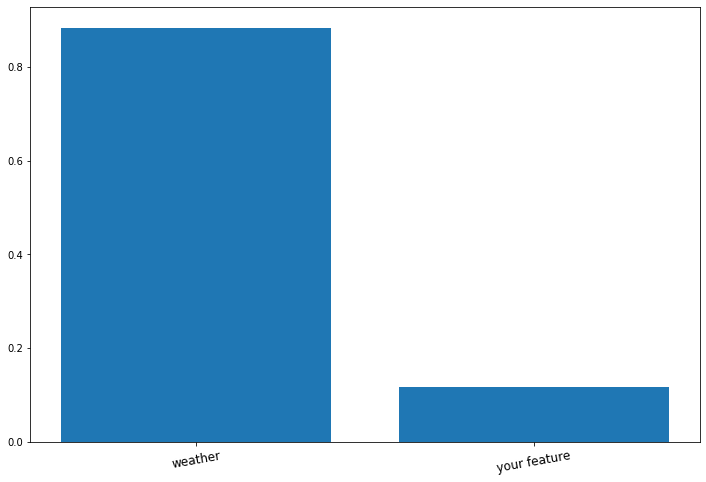

In [37]:
# 直接运行
import matplotlib.pyplot as plt
features = ["weather", "your feature"]
feature_important = gbdt.feature_importances_
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=12,rotation=10)
plt.show()


问题4：哪一个特征更加重要？这符合你的直觉吗？谈谈你在平时的项目中在做特征工程时，对于使用符合直觉的特征的看法，可以举例说明。

回答问题：

### 模型调参
你需要通过[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)对 `GradientBoostingClassifier` 中的参数 `max_depth` 进行调参，得出最优的参数。这里只对一个参数进行调参，是因为数据量非常大，大范围调参将会非常耗时。

In [45]:
# TODO：使用 GridSearchCV 对 GradientBoostingClassifier 进行调参
from sklearn.model_selection import GridSearchCV

# TODO: 设置 max_depth 的范围，建议范围设置小一点，数据量大，搜参比较耗时
params = 

#TODO：设置estimator 为 GradientBoostingClassifier 分类器，除了 max_depth 以外的不需要搜索的参数可以直接用上面值
estimator = 
# TODO: 设置 GridSearchCV, 建议 建议交叉验证`cv`设置小一点，数据量大，交叉验证很慢，scoring="roc_auc"
grid_cv = 

grid_cv.fit(train_x, train_y)

KeyboardInterrupt: 

问题5：调参结果得出最优参数是多少？
- max_depth= 
- learning_rate = 

## 模型对比

目前为止，我们已经对一个实际问题的复杂的数据进行了处理，并抽取了一两个特征，然后进行了模型训练。你可以按照这个流程做更多的特征工程的工作。由于数据量大，我们已经做好了特征工程，并提供了完整的脚本，你可以学习完整的特征工程流程，如果有内存较大的机器的话也可以跑一遍。同时我们也sample了部分数据，以方便接下来快速的进行多个流行的`梯度提升树`模型变种的对比学习。

问题5：通俗的解释什么是 梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）？并列举其优缺点。

回答问题：

问题6：目前比较流行的 `GBDT`的变种有 [Xgboost](https://xgboost.readthedocs.io/en/latest/) 和 [LightGBM](https://lightgbm.readthedocs.io/en/latest/)，请比较这三个梯度提升模型，列举他们各自的特点? （你可以参考一些文档，并给出你的引用出处）

回答问题：

我们已经预先对该数据做了充分的特征工程，然后 `sample` 出了部分数据。数据在路径 `./data/`下面，有训练集`train.csv`和测试集`test.csv`

In [47]:
# 直接运行读取数据，并分别得到 X 和 Y 的数据

# 处理训练集
train_x = pd.read_csv("./data/train.csv")
train_y = train_x["飞机延误目标"].values
del(train_x["飞机延误目标"])
# 处理测试集
test_x = pd.read_csv("./data/test.csv")
test_y = test_x["飞机延误目标"].values
del(test_x["飞机延误目标"])

### 对 gbdt 进行调参

按照上面简单模型构建部分的流程，先定义 GradientBoostingClassifier，并设置里面固定参数；然后设置需要调优的参数，然后通过 网格搜索 `GridSearchCV` 进行搜索最优参数。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics



# TODO: 需要调的参数，比如 max_depth, n_estimators, learning_rate
cv_params = 


#TODO：设置 GBDT 分类器 GradientBoostingClassifier
model = 
# TODO: 设置 GridSearchCV
grid_cv = 
# TODO: 模型训练
grid_cv.fit(train_x, train_y)

# TODO：在测试集上预测，并计算准确率

# TODO：预测测试集的结果
predict_y = 
# TODO：计算 准确率
auc = 
# 打印准确率结果
print("准确率：{}".format(auc))

# TODO：打印最优参数


准确率：0.9955071666666666


### 对 Xgboost 进行调参
关于xgboost 设置和调参与gbdt类似，参数也是类似的，比如 `n_estimators`表示树的个数；`max_depth`表示构建树的深度，越大越容易过拟合；`gamma`表示用于控制是否后剪枝的参数；`reg_lambda`是用来控制模型复杂度的L2正则化的参数，值越大，模型越不容易过拟合，等等。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

In [59]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb


# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params =
model = 

grid_cv = 
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率

# TODO：预测测试集的结果
predict_y = 
# TODO：计算 准确率

auc=
# 打印准确率结果
print("准确率：{}".format(auc))

# TODO：打印最优参数


准确率：0.9529746666666666


问题7：在这个任务中，`GBDT`和`xgboost`的性能如何？哪一个更优？

回答问题：

问题8：总结你对`GBDT`调参的经验与总结

回答问题：